In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [ ]:
waxa = {
    "kvm":[10, 78, 31, 45, 50, 68, 79, 87, 91, 101 ],
    "narxi":[560, 1078, 1928, 2198, 3949, 3649, 4430, 4071, 4535, 5513]
}
df = pd.DataFrame(waxa)

In [32]:
df

,kvm,narxi_s
0,10,560
1,78,1078
2,31,1928
3,45,2198
4,50,3949
5,68,3649
6,79,4430
7,87,4071
8,91,4535
9,101,5513


In [36]:
X = df[["kvm"]]
y = df["narxi_s"]

In [38]:
X

,kvm
0,10
1,78
2,31
3,45
4,50
5,68
6,79
7,87
8,91
9,101


In [40]:
y

0     560
1    1078
2    1928
3    2198
4    3949
5    3649
6    4430
7    4071
8    4535
9    5513
Name: narxi_s, dtype: int64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [46]:
X_train


,kvm
5,68
0,10
7,87
2,31
9,101
4,50
3,45
6,79


In [48]:
y_train

5    3649
0     560
7    4071
2    1928
9    5513
4    3949
3    2198
6    4430
Name: narxi_s, dtype: int64

In [ ]:
wox = LinearRegression()

In [ ]:
wox.fit(X_train,y_train)

LinearRegression()

In [ ]:
weight =wox.coef_[0]
bias = wox.intercept_

In [56]:
LR_y=weight*X+bias

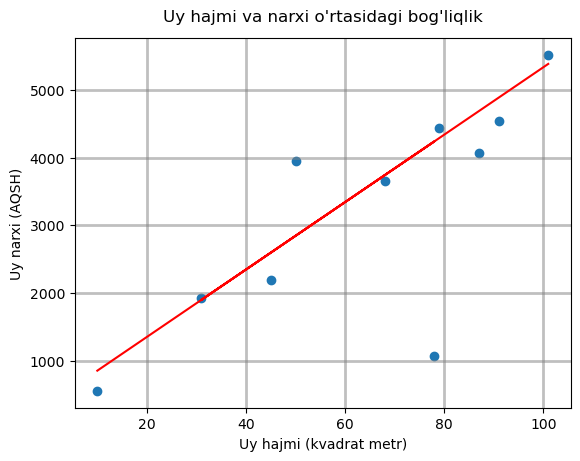

In [58]:
plt.scatter(X,y)
plt.plot(X,LR_y,c='r')
plt.title("Uy hajmi va narxi o'rtasidagi bog'liqlik", size = 12, pad=12)
plt.xlabel("Uy hajmi (kvadrat metr)")
plt.ylabel("Uy narxi (AQSH)")
plt.grid(ls = '-', lw = 2, c = 'grey', alpha = 0.5)
plt.show()

In [ ]:
bashorat = wox.predict(X_test)
print(bashorat)

[4883.5099274  4237.55260269]


In [62]:
y_test

8    4535
1    1078
Name: narxi_s, dtype: int64

In [64]:
xato = y_test - bashorat
print(xato)

8    -348.509927
1   -3159.552603
Name: narxi_s, dtype: float64


In [ ]:
my_grade = wox.predict([[9]])
print(my_grade)

[809.00987925]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
y_pred = wox.predict(X_test)
y_pred

array([4883.5099274 , 4237.55260269])

In [76]:
y_test

8    4535
1    1078
Name: narxi_s, dtype: int64

In [ ]:
print("Intercept (Beta_0):", wox.intercept_)
print("Slope (Beta_1):", wox.coef_[0])

Intercept (Beta_0): 361.8086544572184
Slope (Beta_1): 49.689024977372085


In [82]:
natija = pd.DataFrame({"Asl": y_test, "Bashorat": y_pred})
natija

,Asl,Bashorat
8,4535,4883.509927
1,1078,4237.552603


In [84]:
mae = mean_absolute_error(y_test, y_pred)
print("O'rtacha absalyut xato (MSE):", mae)

O'rtacha absalyut xato (MSE): 1754.0312650451597


In [86]:
# O'rtacha kvadratik xato (MSE) va R-kvadratni hisoblash
mse = mean_squared_error(y_test, y_pred)
print("O'rtacha kvadratik xato (MSE):", mse)

O'rtacha kvadratik xato (MSE): 5052115.909337166


In [88]:
rmse = pow(mse, 1/2)
rmse

2247.6912397696365

In [90]:
r2 = r2_score(y_test, y_pred)
print("R-kvadrat (R^2):", r2)

R-kvadrat (R^2): -0.6909646868894974
